In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest

In [3]:
#3

bmw_sales_data = pd.read_csv('BMW sales data (2010-2024).csv', sep=',')

print("Первые и последние 5 строк:")

bmw_sales_data.head(5)

Первые и последние 5 строк:


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [4]:
bmw_sales_data.tail(5)

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High
49999,X1,2020,North America,Blue,Diesel,Manual,3.3,171003,77492,1764,Low


In [5]:
print("Информацию о типах данных в наборе:\n")
bmw_sales_data.info()

Информацию о типах данных в наборе:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [6]:
print("Основная статистическая информация о данных:\n")
bmw_sales_data.describe()

Основная статистическая информация о данных:



,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [7]:
bmw_sales_data_duplicates = bmw_sales_data.copy()
len_with_duplicates = len(bmw_sales_data_duplicates)
print("Число строк в датасете с дубликатами =", len_with_duplicates)

bmw_sales_data = bmw_sales_data.drop_duplicates().reset_index(drop=True)
len_no_duplicates = len(bmw_sales_data)
print("Число строк в датасете без дубликатов =", len_no_duplicates)

bmw_sales_data


Число строк в датасете с дубликатами = 50000
Число строк в датасете без дубликатов = 50000


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


In [8]:
#4

print("В датасете отсутсвуют такие поля, как ID объектов.")

В датасете отсутсвуют такие поля, как ID объектов.


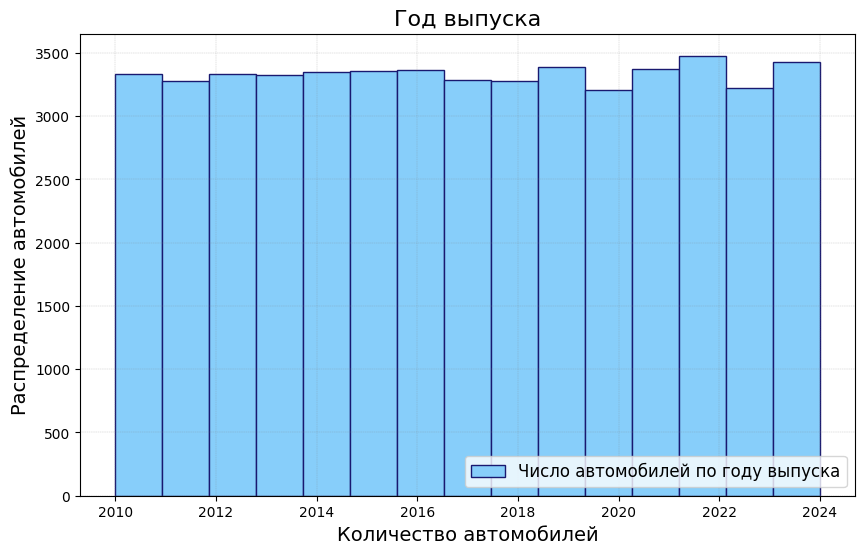

In [9]:
#5

# a)

plt.figure(figsize=(10, 6))

plt.hist(
    bmw_sales_data['Year'],
    bins=len(set(bmw_sales_data['Year'])),              
    color='#87CEFA',      
    edgecolor='#191970',                         
    label='Число автомобилей по году выпуска'
)

plt.title('Год выпуска', fontsize=16)
plt.xlabel('Количество автомобилей', fontsize=14)
plt.ylabel('Распределение автомобилей', fontsize=14)

plt.legend(fontsize=12, loc='lower right')
plt.grid(color='grey', linestyle='--', linewidth=0.3, alpha=0.5)

plt.savefig('graphics/histogram.png')

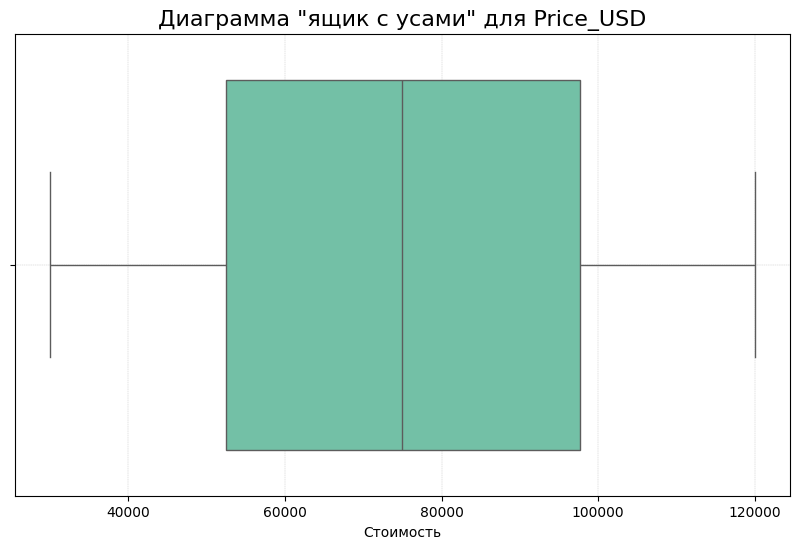

In [10]:
# b)

plt.figure(figsize=(10, 6))

sns.boxplot(
    x=bmw_sales_data['Price_USD'],
    color='#66CDAA'
)

plt.title('Диаграмма "ящик с усами" для Price_USD', fontsize=16)
plt.xlabel('Стоимость')
plt.grid(color='grey', linestyle='--', linewidth=0.3, alpha=0.5)

plt.savefig('graphics/box_plot.png')

#Медианная цена — около 75 000 USD → типичная стоимость BMW в этом датасете.
#Разброс цен — от 55k до 95k USD (средние 50%).
#Общий диапазон без выбросов — от 40k до 120k USD.
#Нет выбросов → цены довольно однородны, нет экстремально дешёвых или дорогих авто.

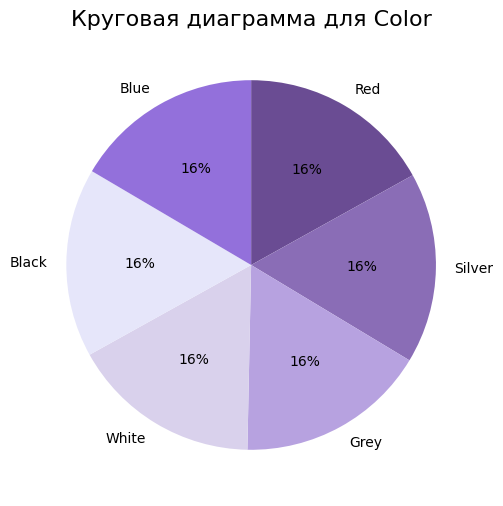

In [11]:
# c)

color_counts = bmw_sales_data['Color'].value_counts()
labels = color_counts.index   # названия цветов
sizes = color_counts.values   # количество машин

plt.figure(figsize=(10, 6))

colors_for_pie = ['#6A4C93', '#8A6DB6', '#B7A2E0', '#D9D1EC', '#E6E6FA', '#9370DB']

pie = plt.pie(
    sizes,
    labels=labels,
    colors=colors_for_pie,
    autopct='%d%%',     # вывод целого числа процентов
    startangle=90,      # начинать с 12 часов
    counterclock=False      # против часовой стрелки = False
)

plt.title('Круговая диаграмма для Color', fontsize=16)

plt.savefig('graphics/pie_chart.png')

plt.show()

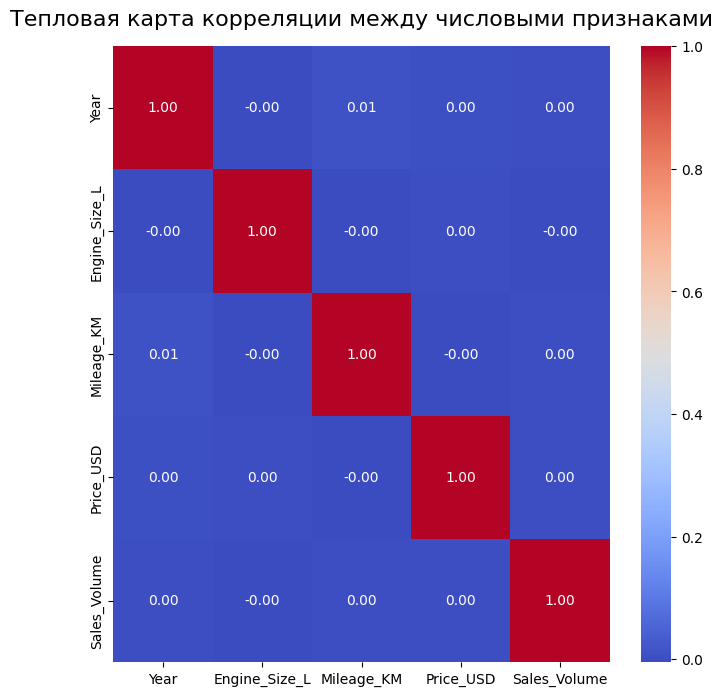

In [ ]:
# d)

numeric_columns = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']
corr_matrix = bmw_sales_data[numeric_columns].corr()

plt.figure(figsize=(8, 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
)

plt.title('Тепловая карта корреляции между числовыми признаками', fontsize=16, pad=15)

plt.savefig('graphics/heatmap.png')

plt.show()

# Твоя тепловая карта показывает, что между основными числовыми 
# признаками BMW в твоём датасете практически нет линейной корреляции.
# Это не ошибка — это информация.

# Она говорит:
# Цена, пробег, год, объём двигателя и объём продаж в этом наборе 
# данных не связаны линейно друг с другом.

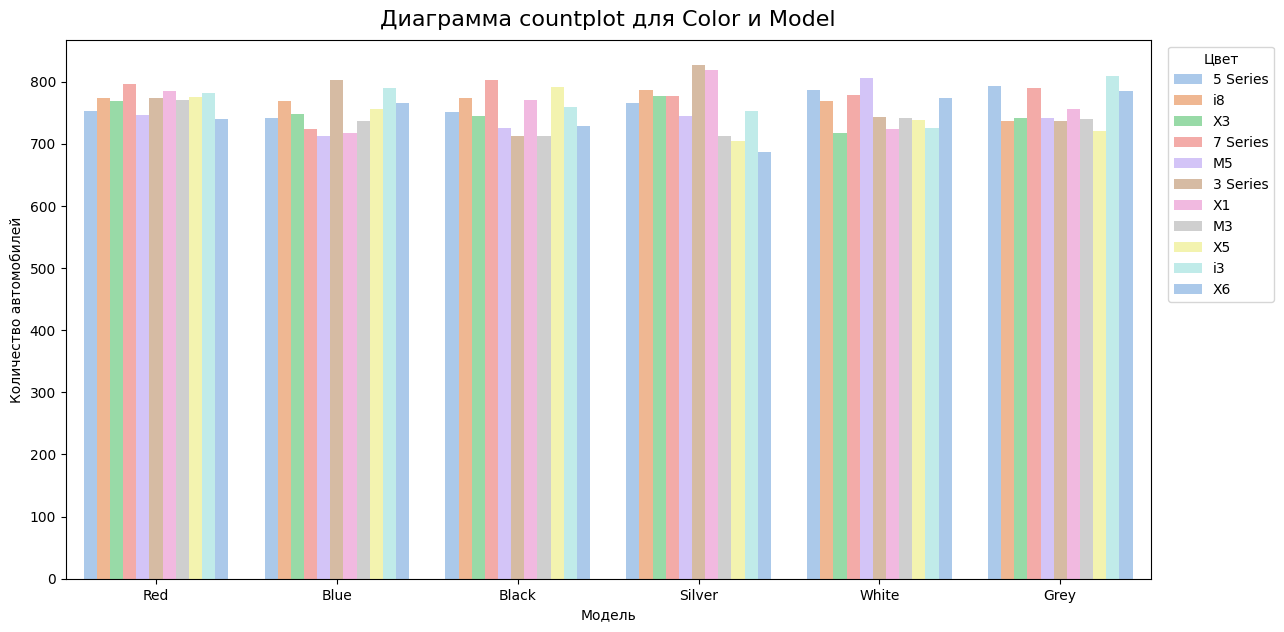

In [63]:
# e)

plt.figure(figsize=(14, 7))

sns.countplot(
    data=bmw_sales_data,
    x='Color',          # основная категория — по X
    hue='Model',        # группировка внутри столбца
    palette='pastel'     # палитра на 10 цветов (достаточно для большинства случаев)
)

plt.title('Диаграмма countplot для Color и Model', fontsize=16, pad=10)

plt.xlabel('Модель')
plt.ylabel('Количество автомобилей')
plt.legend(title='Цвет', bbox_to_anchor=(1.01, 1), loc='upper left')  

plt.savefig('graphics/countplot.png')

plt.show()

In [64]:
#6

bmw_sales_data.isnull().sum()

Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [ ]:
#7

price_data = bmw_sales_data['Price_USD'].head(200)

stat, p_value = normaltest(price_data)

print(f"Statistics: {stat:.2f}, p-value: {p_value:.5f}")

alpha = 0.05  # уровень значимости

if p_value > alpha:
    print("Данные похожи на нормальное распределение.")
else:
    print("Данные не имеют нормального распределения.")

Statistics: 197.76, p-value: 0.00000
Данные НЕ имеют нормального распределения.


In [71]:
#8

categorical_columns = ['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission']

bmw_sales_data_encoded = pd.get_dummies(
    bmw_sales_data,
    columns=categorical_columns, drop_first=True 
)

bmw_sales_data_encoded

,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification,Model_5 Series,Model_7 Series,Model_M3,Model_M5,Model_X1,...,Region_South America,Color_Blue,Color_Grey,Color_Red,Color_Silver,Color_White,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Manual
0,3.5,151748,98740,8300,High,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,True
1,1.6,121671,79219,3428,Low,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2,4.5,10991,113265,6994,Low,True,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
3,1.7,27255,60971,4047,Low,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,2.1,122131,49898,3080,Low,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,4.6,151030,42932,8182,High,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,True
49996,4.2,147396,48714,9816,High,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True
49997,4.5,174939,46126,8280,High,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
49998,3.8,3379,58566,9486,High,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [73]:
#9

bmw_sales_data_encoded.to_csv('bmw_sales_data_encoded.csv', index=False)